삼성전자 종가를 기준으로 가격의 트렌드와 트렌드 강도(모멘텀)을 측정하여 이를 라벨(label)로 사용한다.

- Trend scanning 기법
    - 향후 N 기간동안의 선형 회귀 시 t통계량의 절댓값의 최대값을 사용
    - 즉, 일마다 향후 주어진 기간 중 가장 강한 트렌드를 예측하고자 하는 그날의 정답 트렌드로 지정

이 실험에서는 측정한 트렌드($|\hat{t}|$)를 분위 수로 나누어 이산적인 값으로 지정해주었다. 이는 다음에 분류(classification) 작업을 하기 위함이다.

아래 그래프에서 기간 N을 달리했을 때를 비교한 뒤, 투자자의 트레이딩 기간을 고려해 이를 정해준다.

In [2]:
# lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

# homemade
from features import tautil
from labeling import labeling

In [4]:
import FinanceDataReader as fdr
df_ = fdr.DataReader('005930','2010-1-1','2021-6-1')
df = tautil.ohlcv(df_)

In [5]:
close =df.close

In [6]:
windows=[60]

In [9]:
trend_scanning_regime_q3 = []
for i in windows:
    trend_scanning_regime_q3.append(labeling.trend_scanning_label(close,window=i,q=3)[0].abs())

In [10]:
trend_scanning_q3 = []
for i in windows:
    trend_scanning_q3.append(labeling.trend_scanning_label(close,window=i,q=3)[0])

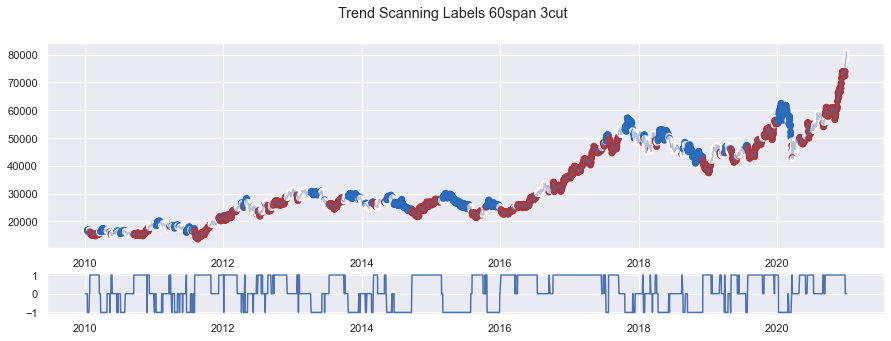

In [14]:
for j in range(len(windows)):
    y = trend_scanning_q3[j][:'2020']
    i = windows[j]
    f, (a0, a1) = plt.subplots(2, gridspec_kw={'height_ratios': [5, 1]}, figsize=(15,5))
    f.suptitle("Trend Scanning Labels {}span 3cut".format(i))
    a0.plot(close[:'2020'],alpha=0.4)
    a0.scatter(close[:'2020'].index,close[:'2020'],c=y, cmap='vlag')
    a1.plot(y.fillna(0))
    f.show()

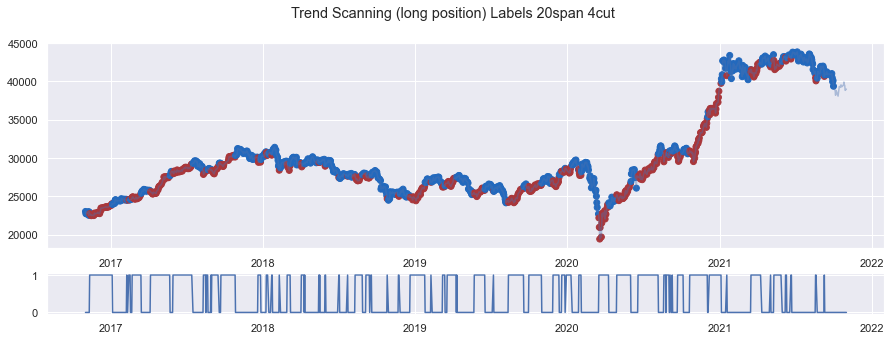

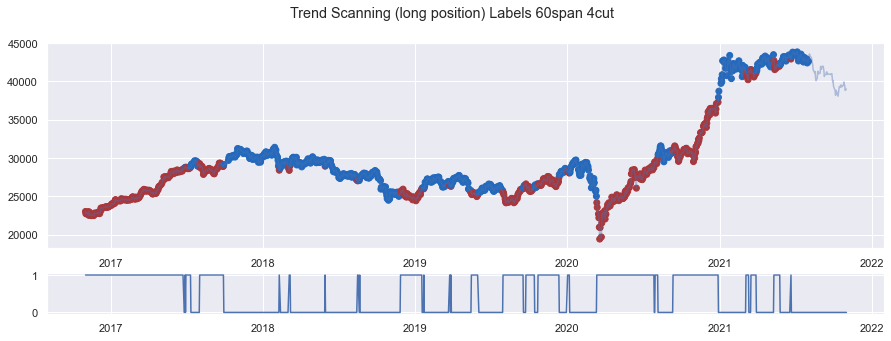

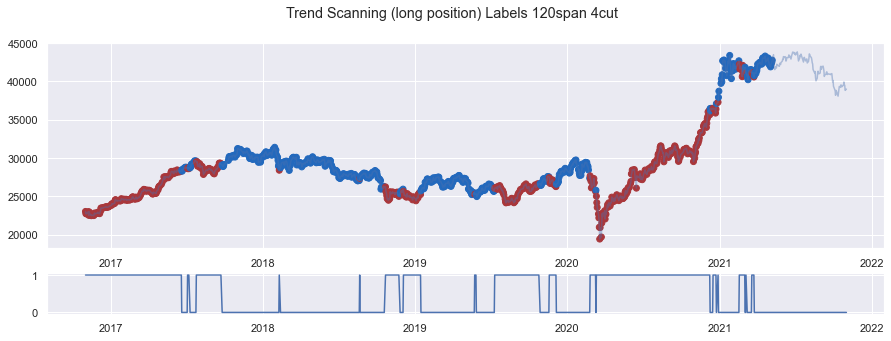

In [75]:
for j in range(len(windows)):
    y = np.sign(trend_scanning_q3[j]-1)+1
    i = windows[j]
    f, (a0, a1) = plt.subplots(2, gridspec_kw={'height_ratios': [5, 1]}, figsize=(15,5))
    f.suptitle("Trend Scanning (long position) Labels {}span 4cut".format(i))
    a0.plot(close,alpha=0.4)
    a0.scatter(close.index,close,c=y, cmap='vlag')
    a1.plot(y.fillna(0))
    f.savefig("c:image/labeling/trend_scanning_long_pos_{}.png".format(i))
    f.show()